# Postprocessing of Generation results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
idx_s=214
start_id = 0
end_id = 14
var_par='h_G'
unit=' [mm]'

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)
df_xy=pd.read_csv(xy_file_name)

In [3]:
df_xy

,Unnamed: 0,ID,h_G,L,b1,t_p,t_w,h_w,alpha_l,h_v,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
0,0,0,300.000000,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,1,2.646147,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
1,1,1,385.714286,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,0,2.781184,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
2,2,2,471.428571,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,0,2.913403,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
3,3,3,557.142857,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,0,3.039422,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
4,4,4,642.857143,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,0,3.144497,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
5,5,5,728.571429,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,0,2.781573,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
6,6,6,814.285714,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,0,2.866278,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
7,7,7,900.000000,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,2,2.204295,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
8,8,8,985.714286,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,1,2.288484,9642.401367,281.083832,-352.941162,eta_y_bot_stresses
9,9,9,1071.428571,5800,9720,400,400,2780,90,0,...,9536.4,5221.8,0.0,bot,1,2.373646,9642.401367,281.083832,-352.941162,eta_y_bot_stresses


## Plot of minimal $\eta$ factors

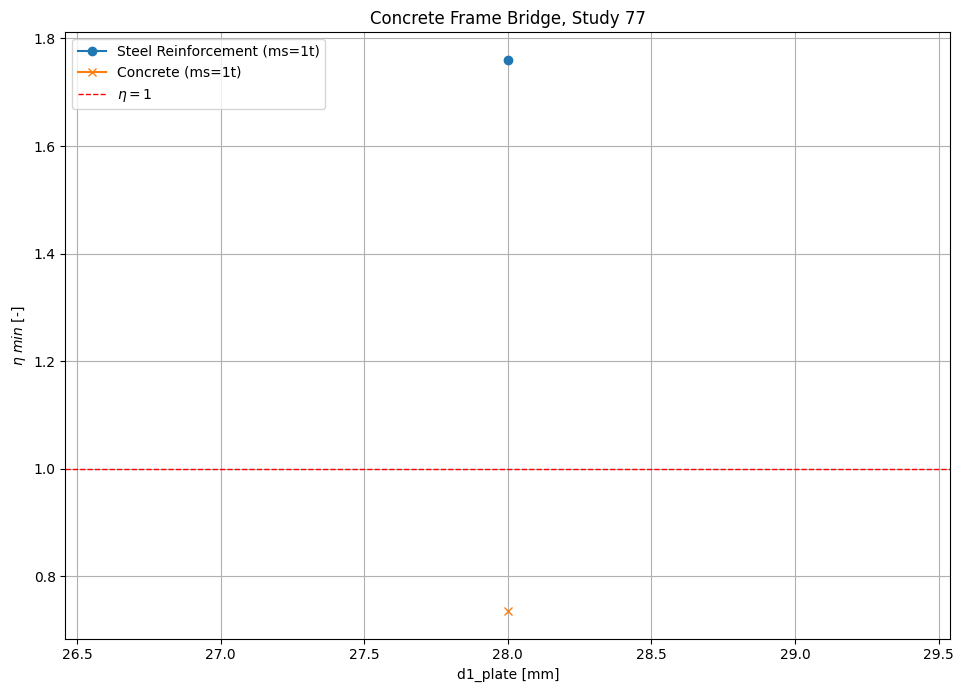

In [4]:
cm = 1/2.54
plt.figure(figsize = (29*cm, 20*cm))
plt.title('Concrete Frame Bridge, Study {}'.format(idx_s))
plt.plot(df_xy[var_par], df_xy['eta_min_s'],label='Steel Reinforcement (ms=1t)', marker='o')
plt.plot(df_xy[var_par], df_xy['eta_min_c'], label='Concrete (ms=1t)', marker='x')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\eta=1$')
plt.xlabel(var_par+unit)
plt.ylabel('$\eta \ min$ [-]')
plt.grid()
plt.legend(loc = "upper left")

## 3D plot of most critical point

### Bridge as a surface

In [4]:
# extract information about the bridge that we need to plot the bridge

ID=0

t_p=df_xy['t_p'][ID]
L=df_xy['L'][ID]
b=df_xy['b1'][ID]
h_w=df_xy['h_w'][ID]
h=h_w+t_p

x_s=df_xy['x_s'][ID]
y_s=df_xy['y_s'][ID]
z_s=df_xy['z_s'][ID]
layer=df_xy['Location_s'][ID]
eta_s=df_xy['eta_min_s'][ID]

x_c=df_xy['x_c'][ID]
y_c=df_xy['y_c'][ID]
z_c=df_xy['z_c'][ID]
location=df_xy['Location_c'][ID]
eta_c=df_xy['eta_min_c'][ID]

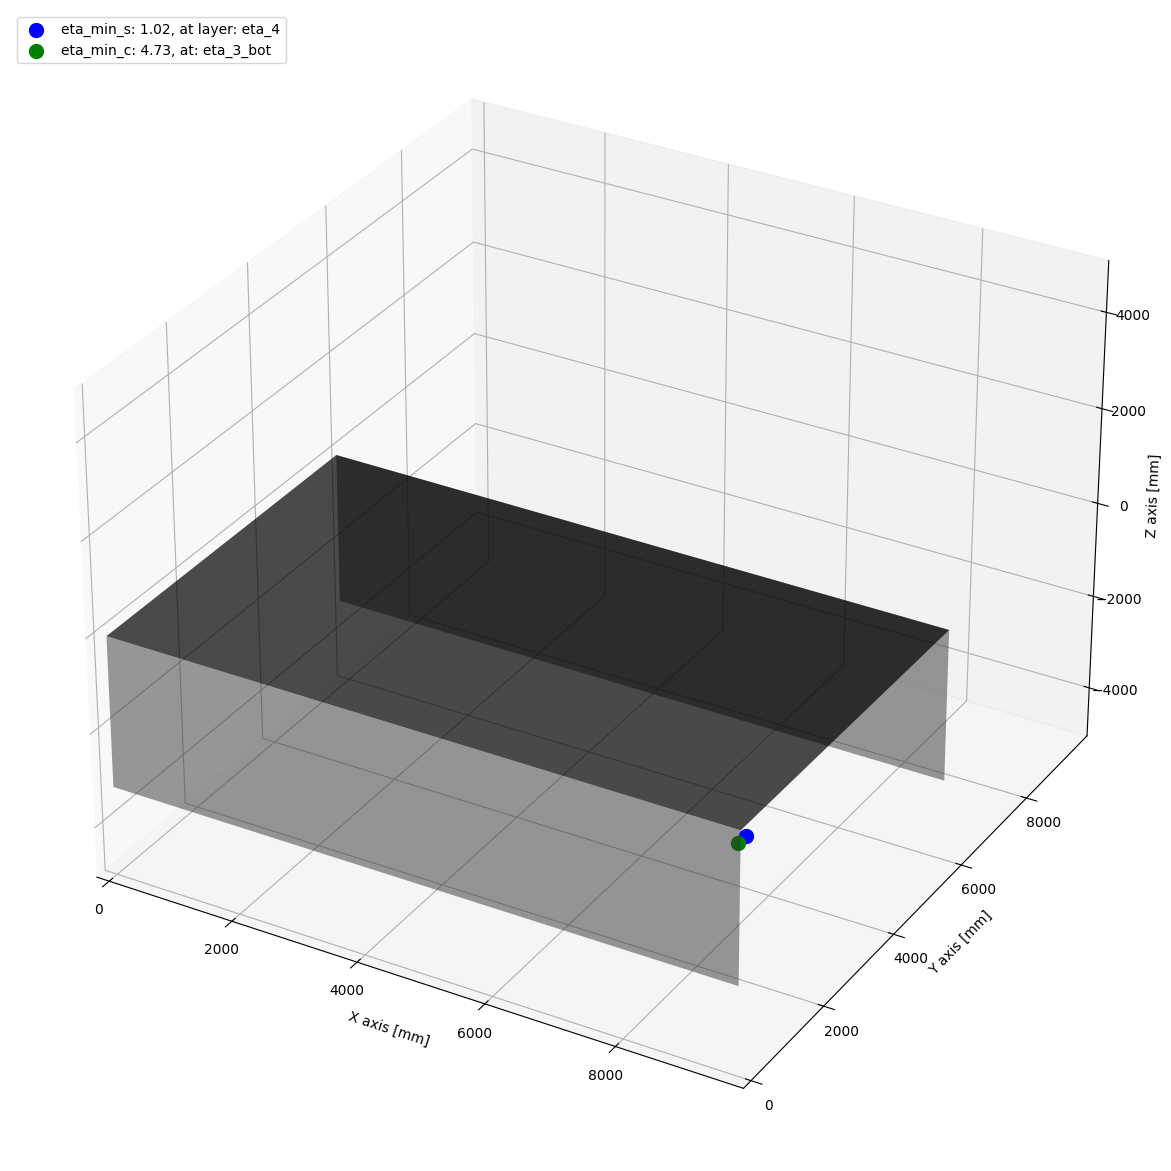

In [5]:
from mpl_toolkits.mplot3d import Axes3D

cm = 1/2.54

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p

z= np.linspace(0, -h, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Creating a 3D plot
fig = plt.figure(figsize = (30*cm, 30*cm))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surfaces
ax.plot_surface(x_p, y_p, z_p, alpha=0.7, rstride=100, cstride=100, color='black')
ax.plot_surface(x_w, y_w1, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')
ax.plot_surface(x_w, y_w2, z_w, alpha=0.5, rstride=100, cstride=100, color='gray')



# Plotting the specific point
ax.scatter(x_s, y_s, z_s, color='blue', s=100, label='eta_min_s: {:0.2f}, at layer: {}'.format(eta_s, layer)) 
ax.scatter(x_c, y_c, z_c, color='green', s=100, label='eta_min_c: {:0.2f}, at: {}'.format(eta_c, location)) 

# Setting labels
ax.set_xlabel('X axis [mm]')
ax.set_ylabel('Y axis [mm]')
ax.set_zlabel('Z axis [mm]')
ax.legend(loc='upper left') 

# Calculate aspect ratio
max_range = np.array([x_w.max()-x_w.min(), y_p.max()-y_p.min(), z_w.max()-z_w.min()]).max()


ax.set_xlim(0,max_range)
ax.set_ylim(0,max_range)
ax.set_zlim(-max_range/2,max_range/2)

fig.tight_layout()


In [6]:
figname='critical_point_{}_Batch_{}_{}'.format(var_par,idx_s,ID)
fig_folder_path="D:/ETHZ/IBK-SBB/VII. 1D Paramterstudie Geometrie/Images/Critical position/"

fig.savefig(fig_folder_path+figname+".png")

### Bridge as a volume

In [7]:
# extract information about the bridge that we need to plot the bridge

ID=0

t_w=df_xy["t_w"][ID]

t_p=df_xy['t_p'][ID]
L=df_xy['L'][ID]
b=df_xy['b1'][ID]
h_w=df_xy['h_w'][ID]
h=h_w+t_p

x_s=df_xy['x_s'][ID]
y_s=df_xy['y_s'][ID]
z_s=df_xy['z_s'][ID]
layer=df_xy['Location_s'][ID]
eta_s=df_xy['eta_min_s'][ID]

x_c=df_xy['x_c'][ID]
y_c=df_xy['y_c'][ID]
z_c=df_xy['z_c'][ID]
location=df_xy['Location_c'][ID]
eta_c=df_xy['eta_min_c'][ID]

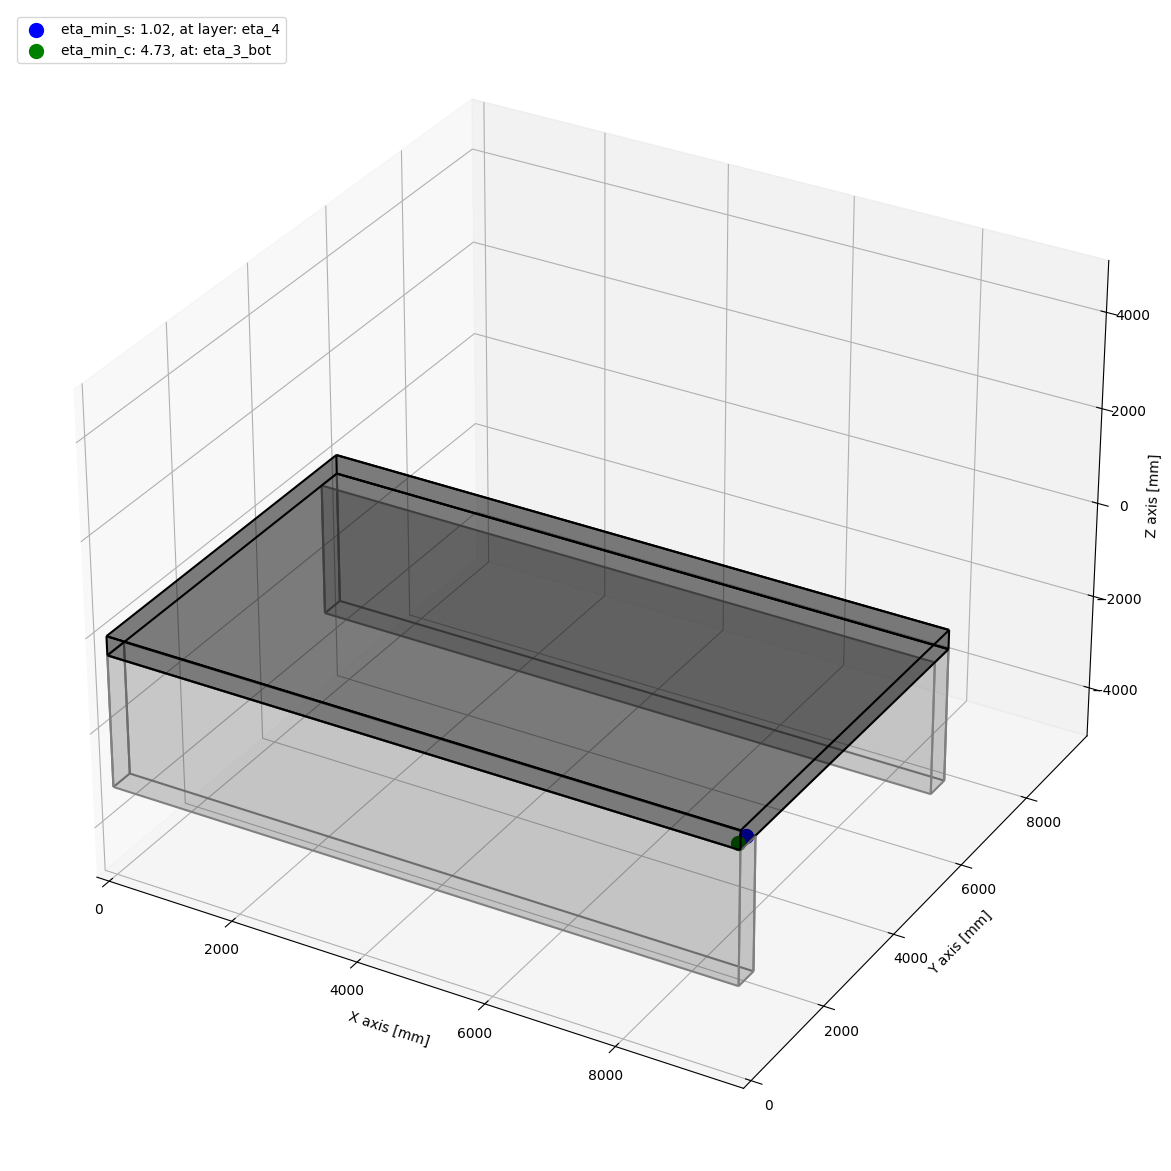

In [8]:
from mpl_toolkits.mplot3d import Axes3D

cm = 1/2.54

# Creating a grid of values for plotting
x = np.linspace(0, b, 100)
y = np.linspace(0, L, 100)
x_p, y_p = np.meshgrid(x, y)
z_p = 0*x_p*y_p

z= np.linspace(0, -h_w, 100)
x_w, z_w = np.meshgrid(x, z)
y_w1=0*x*z
y_w2=L+0*x*z

# Creating a 3D plot
fig = plt.figure(figsize = (30*cm, 30*cm))
ax = fig.add_subplot(111, projection='3d')

# Closing surfaces
zpc1 = np.linspace(0, -t_p, 100)
x_pc1, z_pc1 = np.meshgrid(x, zpc1)

y_pc2, z_pc2 = np.meshgrid(y, zpc1)
x_pc2 = 0*z_pc2+b

yw1c = np.linspace(0, -t_w, 100)
y_w1c, z_w1c = np.meshgrid(yw1c, z)

####################################################################################################################
#Surfaces
####################################################################################################################

#Plate
ax.plot_surface(x_p, y_p, z_p, rstride=100, cstride=100, color=('black',0.5)) 
ax.plot_surface(x_w, y_w1, z_pc1, rstride=100, cstride=100, color=('black',0.5))
ax.plot_surface(x_pc2, y_pc2, z_pc2, rstride=100, cstride=100, color=('black',0.5))

#Wall 1
ax.plot_surface(x_w, y_w1, z_w-t_p, rstride=100, cstride=100, color=('gray',0.25))
ax.plot_surface(x_pc2, y_w1c+t_w, z_w1c-t_p, rstride=100, cstride=100, color=('gray',0.25))

#Wall 2
ax.plot_surface(x_w, y_w2-t_w, z_w-t_p, rstride=100, cstride=100, color=('gray',0.25))
ax.plot_surface(x_pc2, y_w1c+L, z_w1c-t_p, rstride=100, cstride=100, color=('gray',0.25))

####################################################################################################################
#Wireframe
####################################################################################################################

#Plate
ax.plot_wireframe(x_p, y_p, z_p, rstride=100, cstride=100, color='black')
ax.plot_wireframe(x_p, y_p, z_p-t_p, rstride=100, cstride=100, color='black')
ax.plot_wireframe(x_w, y_w1, z_pc1, rstride=100, cstride=100, color='black')
ax.plot_wireframe(x_w, y_w2, z_pc1, rstride=100, cstride=100, color='black')

#Wall 1
ax.plot_wireframe(x_w, y_w1, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_w, y_w1+t_w, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2, y_w1c+t_w, z_w1c-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2*0, y_w1c+t_w, z_w1c-t_p, rstride=100, cstride=100, color="gray")

#Walls 2
ax.plot_wireframe(x_w, y_w2, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_w, y_w2-t_w, z_w-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2, y_w1c+L, z_w1c-t_p, rstride=100, cstride=100, color="gray")
ax.plot_wireframe(x_pc2*0, y_w1c+L, z_w1c-t_p, rstride=100, cstride=100, color="gray")


# Plotting the specific point
ax.scatter(x_s, y_s, z_s, color='blue', s=100, label='eta_min_s: {:0.2f}, at layer: {}'.format(eta_s, layer)) 
ax.scatter(x_c, y_c, z_c, color='green', s=100, label='eta_min_c: {:0.2f}, at: {}'.format(eta_c, location)) 

# Setting labels
ax.set_xlabel('X axis [mm]')
ax.set_ylabel('Y axis [mm]')
ax.set_zlabel('Z axis [mm]')
ax.legend(loc='upper left') 

# Calculate aspect ratio
max_range = np.array([x_w.max()-x_w.min(), y_p.max()-y_p.min(), z_w.max()-z_w.min()]).max()


ax.set_xlim(0,max_range)
ax.set_ylim(0,max_range)
ax.set_zlim(-max_range/2,max_range/2)

fig.tight_layout()

In [9]:
figname='birdge_as_volume_critical_point_{}_Batch_{}_{}'.format(var_par,idx_s,ID)
fig_folder_path="D:/ETHZ/IBK-SBB/VII. 1D Paramterstudie Geometrie/Images/Critical position/"

fig.savefig(fig_folder_path+figname+".png")